# Orders

Investigate the **orders**, and associate **review score**.



| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  
  


In [1]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
#Colab read data from google drive

import os
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Pornpan(Eye)')

In [5]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [7]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['customers', 'geolocation', 'order_items', 'order_payments', 'orders', 'order_reviews', 'products', 'product_category_name_translation', 'sellers'])

In [8]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(orders.shape == (99441, 8))

## 1. Code `order.py`

### a) `get_wait_time`
    ❓ Return a Dataframe with:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status


🎁 The pseudo-code below 👇 for this first method:

> 1. Inspect the `orders` dataframe
2. Filter the dataframe on `delivered orders`
3. Handle `datetime`
    - python [`datetime`](https://docs.python.org/3/library/datetime.html) 
    - convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Compute `wait_time`
5. Compute `expected_wait_time`
6. Compute `delay_vs_expected`
7. Check the new dataframe 
8. Copy-paste it from the notebook to to `olist/order.py`

In [9]:

orders = orders[orders['order_status'] == 'delivered']
orders.shape


(96478, 8)

In [10]:


orders["wait_time"] = pd.to_datetime(orders.order_delivered_customer_date) -  pd.to_datetime(orders.order_approved_at)
orders["expected_wait_time"] = pd.to_datetime(orders.order_estimated_delivery_date) -  pd.to_datetime(orders.order_approved_at)
orders["delay_vs_expected"] = pd.to_datetime(orders.order_delivered_customer_date) - pd.to_datetime(orders.order_estimated_delivery_date) 
orders[["order_id", "wait_time", "expected_wait_time", "delay_vs_expected", "order_status"]]


,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8 days 10:17:58,15 days 12:52:45,-8 days +21:25:13,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,12 days 12:03:18,17 days 20:35:33,-6 days +15:27:45,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9 days 09:11:06,26 days 15:04:37,-18 days +18:06:29,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13 days 04:42:43,26 days 04:14:01,-13 days +00:28:42,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2 days 19:56:33,12 days 01:39:31,-10 days +18:17:02,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8 days 05:13:56,18 days 14:05:55,-11 days +15:08:01,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22 days 04:27:19,23 days 10:49:23,-2 days +17:37:56,delivered
99438,83c1379a015df1e13d02aae0204711ab,24 days 20:20:01,30 days 08:55:44,-6 days +11:24:17,delivered
99439,11c177c8e97725db2631073c19f07b62,17 days 01:56:33,37 days 02:23:39,-21 days +23:32:54,delivered


In [12]:

from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


### b) `get_review_score`
     ❓ Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score




In [1]:
reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))
reviews.head()

NameError: ignored

In [15]:


reviews['dim_is_five_star'] = reviews['review_score'].apply(lambda x: 1 if x == 5 else 0)
reviews['dim_is_one_star'] = reviews['review_score'].apply(lambda x: 1 if x == 1 else 0)
reviews[['order_id', 'dim_is_five_star', 'dim_is_one_star', 'review_score']]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [16]:
reviews[['order_id', 'dim_is_five_star', 'dim_is_one_star', 'review_score']]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [17]:

from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


### c) `get_number_products`:
     ❓ Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [19]:

data["order_items"].groupby("order_id").count()\
.rename(columns={"order_item_id": "number_of_products"})\
.sort_values("number_of_products")[['number_of_products']]
products = data['order_items'].copy()
products.groupby('order_id').aggregate({'order_item_id' : 'sum'}).reset_index()

number_products = data['order_items'].copy()
number_products.groupby('order_id').aggregate({'order_item_id' : 'sum'}).reset_index()

,order_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


### d) `get_number_sellers`:
     ❓ Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)
        


In [20]:

sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


### e) `get_price_and_freight`
     Returns a DataFrame with:
        order_id, price, freight_value



In [21]:

Order().get_number_sellers()

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


### e) `get_distance_seller_customer` 


    ❓ Returns a Dataframe with:
        order_id, distance_seller_customer (the distance in km between customer and seller)



In [22]:

matching_geo = Order().get_distance_seller_customer()

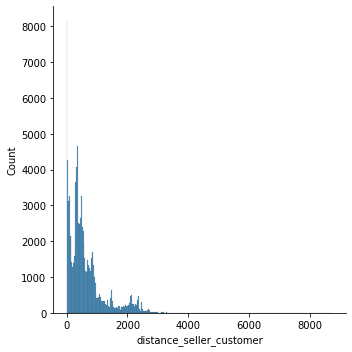

In [23]:

sns.displot(data = matching_geo, x ='distance_seller_customer')